In [1]:
# Importing Libraries and configuring the data display by Emmanuel Abdallah odori 20/U/7771/PS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

In [2]:
"""
Project title:Analysis and visualization of the UACE results from 2011-2015
project objectives:
1. The objective of the analysis is to identify the the trends of UACE results in 
Gulu district from 2011-2015 by year and school. 
"""

'\nProject title:Analysis and visualization of the UACE results from 2011-2015\nproject objectives:\n1. The objective of the analysis is to identify the the trends of UACE results in \nGulu district from 2011-2015 by year and school. \n'

In [2]:
# Loading the UACE Results 2011-2015 dataset by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results = pd.read_csv("UaceResults2011-2015.csv")


In [3]:
# Displaying the first 10 rows in UACE_results dataFrame created 
# for initial analysis by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results.head(10)

,District_Name,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,3.0,66.7,33.3,0.0,0.0,0.0,8.0,75.0,25.0,0.0,0.0,2.0,50.0,0.0,50.0,0.0,1,0.0,0.0,100.0,0.0
1,AMUDAT,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,8.0,12.5,75.0,12.5,0.0,0.0,14.0,71.4,28.6,0.0,0.0,9.0,55.6,44.4,0.0,0.0,4,25.0,50.0,25.0,0.0
2,AMUDAT Total,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,11.0,27.3,63.6,9.1,0.0,0.0,22.0,72.7,27.3,0.0,0.0,11.0,54.5,36.4,9.1,0.0,,20.0,40.0,40.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,14,21.4,42.9,35.7,0.0
4,PADER,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,22,40.9,50.0,9.1,0.0
5,PADER,PADER TOWN HALL LAGWAI SEED SS,FEMALE,3.0,66.7,0.0,0.0,33.3,0.0,4.0,50.0,25.0,0.0,25.0,0.0,10.0,40.0,40.0,20.0,0.0,3.0,33.3,33.3,33.3,0.0,3,66.7,33.3,0.0,0.0
6,PADER,NaN,MALE,17.0,41.2,52.9,0.0,5.9,0.0,22.0,40.9,40.9,13.6,4.5,0.0,32.0,75.0,18.8,6.3,0.0,18.0,44.4,55.6,0.0,0.0,10,71.0,20.0,0.0,0.0
7,PADER,PAJULE SECONDARY SCHOOL,FEMALE,NaN,0.0,0.0,0.0,0.0,0.0,5.0,40.0,40.0,20.0,0.0,0.0,16.0,12.5,62.5,25.0,0.0,4.0,100.0,0.0,0.0,0.0,2,50.0,50.0,0.0,0.0
8,PADER,NaN,MALE,NaN,0.0,0.0,0.0,0.0,0.0,19.0,15.8,52.6,31.6,0.0,0.0,58.0,37.9,37.9,24.1,0.0,28.0,46.4,32.1,21.4,0.0,26,43.8,46.2,3.8,0.0
9,PADER Total,NaN,NaN,20.0,45.0,45.0,0.0,10.0,0.0,50.0,32.0,44.0,20.0,4.0,0.0,116.0,44.8,36.2,19.0,0.0,53.0,49.1,37.7,13.2,0.0,77,43.8,42.9,10.4,0.0


In [4]:
# Getting the shape of the dataframe i.e. numbers of rows and column by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results.shape
# As per the shape we are having 3916 rows and 30 columns in the dataset

(3916, 30)

In [6]:
# Getting more informations about the of the dataframe i.e. numbers of rows and column by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results.describe()

,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
count,2676.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,2931.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3363.000000,3916.000000,3916.000000,3916.000000,3916.000000,3558.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000
mean,116.234305,19.369101,26.034806,15.612998,6.246144,1.074413,113.979529,19.669331,30.053779,17.875868,6.223366,1.027222,207.188225,39.931793,31.680797,12.301124,1.967058,91.284148,36.815041,33.954290,16.549821,3.541088,35.830439,38.399591,12.568284,1.204648
std,2070.812442,22.703456,22.207197,16.609441,11.048565,4.579570,2121.616198,21.260560,22.300994,17.009601,10.230743,3.905497,4119.502442,28.996888,20.602430,14.680369,6.137918,1870.322164,27.452396,20.059448,16.556906,8.606630,24.906434,21.892027,15.235757,4.571343
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,13.800000,16.700000,0.000000,0.000000,10.000000,14.100000,22.200000,0.000000,0.000000,16.700000,25.000000,0.000000,0.000000
50%,28.000000,11.100000,30.000000,11.500000,0.000000,0.000000,28.000000,13.300000,34.650000,15.600000,0.000000,0.000000,50.000000,40.000000,34.550000,7.100000,0.000000,21.000000,34.650000,36.000000,12.500000,0.000000,34.100000,41.200000,8.000000,0.000000
75%,55.000000,33.300000,43.325000,27.500000,8.300000,0.000000,53.000000,32.750000,46.600000,30.400000,9.100000,0.000000,94.000000,62.350000,46.200000,19.850000,0.000000,41.000000,56.100000,46.700000,27.100000,3.700000,51.900000,52.100000,20.000000,0.000000
max,103681.000000,100.000000,100.000000,100.000000,72.200000,100.000000,111358.000000,100.000000,100.000000,100.000000,65.400000,69.600000,232258.000000,100.000000,100.000000,100.000000,78.000000,108263.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
# Getting more informations about the of the dataframe i.e. numbers of rows and column by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District_Name    3916 non-null   object 
 1   SCHOOL           1957 non-null   object 
 2   Gender           3802 non-null   object 
 3   2011 Total       2676 non-null   float64
 4   %0-5 Points      3916 non-null   float64
 5   %6-10 Points     3916 non-null   float64
 6   %11-15 Points    3916 non-null   float64
 7   %16-20 Points    3916 non-null   float64
 8   %21-25 Points    3916 non-null   float64
 9   2012 Total       2931 non-null   float64
 10  %0-5 Points.1    3916 non-null   float64
 11  %6-10 Points.1   3916 non-null   float64
 12  %11-15 Points.1  3916 non-null   float64
 13  %16-20 Points.1  3916 non-null   float64
 14  %21-25 Points.1  3916 non-null   float64
 15  2013 Total       3363 non-null   float64
 16  %0-5 Points.2    3916 non-null   float64
 17  %6-10 Points.2

In [8]:
# Displaying the column names by Emmanuel abdallah odori 20/U/7771/PS
UACE_results.columns

Index(['District_Name', 'SCHOOL', 'Gender', '2011 Total', '%0-5 Points',
       '%6-10 Points', '%11-15 Points', '%16-20 Points', '%21-25 Points',
       '2012 Total', '%0-5 Points.1', '%6-10 Points.1', '%11-15 Points.1',
       '%16-20 Points.1', '%21-25 Points.1', '2013 Total', '%0-5 Points.2',
       '%6-10 Points.2', '%11-15 Points.2', '%16-20 Points.2', '2014 Total',
       '%0-5 Points.3', '%6-10 Points.3', '%11-15 Points.3', '%16-20 Points.3',
       '2015 Total', '%0-5 Points.4', '%6-10 Points.4', '%11-15 Points.4',
       '%16-20 Points.4'],
      dtype='object')

In [9]:
# Convert '2015 Total' to float while handling empty strings and non-numeric values by Emmanuel abdallah odori 20/U/7771/PS
UACE_results['2015 Total'] = pd.to_numeric(UACE_results['2015 Total'], errors='coerce').astype(float)

In [10]:
# finding the number of districts whose school results are in this dataset by Emmanuel abdallah odori 20/U/7771/PS
# Step 2: Access the column containing the text data
column_name = 'District_Name' 
# Filtering out rows with more than one word e.g the rows with the word Total
one_word_rows = UACE_results[UACE_results[column_name].str.split().str.len() == 1]
words = ' '.join(one_word_rows[column_name].dropna().tolist()).split()
#using regex to remove non-alphanumeric characters from the districts names
words = [re.sub(r'\W+', '', word).lower() for word in words]
# Counting the occurrences of each district
word_counts = Counter(words)
# sorting the districts based on their frequencies
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
# Displaying the district names and the appearence
for word, count in sorted_word_counts.items():
    print(f'{word} appears {count} times')

wakiso appears 523 times
kampala appears 356 times
mukono appears 201 times
mbarara appears 108 times
luwero appears 98 times
jinja appears 86 times
kabale appears 84 times
mpigi appears 83 times
buikwe appears 78 times
mbale appears 69 times
iganga appears 68 times
mityana appears 64 times
ntungamo appears 60 times
kasese appears 60 times
tororo appears 55 times
mubende appears 48 times
rukungiri appears 47 times
kabarole appears 46 times
rakai appears 46 times
sheema appears 45 times
kalungu appears 44 times
kamuli appears 44 times
arua appears 44 times
kayunga appears 42 times
lira appears 39 times
ibanda appears 39 times
hoima appears 37 times
kibaale appears 36 times
butambala appears 35 times
soroti appears 34 times
kanungu appears 32 times
gulu appears 30 times
manafwa appears 30 times
busia appears 28 times
kamwenge appears 28 times
mayuge appears 27 times
masindi appears 27 times
kiruhura appears 27 times
nakasongola appears 25 times
lwengo appears 25 times
kisoro appears 25 t

In [11]:
# Finding the total number of districts in the dataframe by Emmanuel abdallah odori 20/U/7771/PS
total_distinct_words = len(set(words))
print(f'Total number of districts: {total_distinct_words}')

Total number of districts: 107


In [14]:
# Checking for null cells by Emmanuel abdallah odori 20/U/7771/PS
# Check for null values in the entire DataFrame
null_values = UACE_results.isnull()
# check the sum of null values in each column
column_null_counts = UACE_results.isnull().sum()
# check the sum of null values in each row
row_null_counts = UACE_results.isnull().sum(axis=1)

# Print the results
print("Null values in the entire DataFrame:")
print(null_values)

print("\nNull values count in each column:")
print(column_null_counts)

print("\nNull values count in each row:")
print(row_null_counts)


Null values in the entire DataFrame:
      District_Name  SCHOOL  Gender  2011 Total  %0-5 Points  %6-10 Points  \
0             False   False   False        True        False         False   
1             False    True   False        True        False         False   
2             False    True    True        True        False         False   
3             False   False   False        True        False         False   
4             False    True   False        True        False         False   
...             ...     ...     ...         ...          ...           ...   
3911          False   False   False        True        False         False   
3912          False   False   False       False        False         False   
3913          False    True   False       False        False         False   
3914          False    True    True       False        False         False   
3915          False    True    True       False        False         False   

      %11-15 Points  %16-2

In [15]:

# Filling all the empty and null cells in columns with numeric data types with zeros 
# by Emmanuel abdallah odori 20/U/7771/PS
for col in UACE_results.columns:
    # Check if the column contains numeric data (integers or floats)
    if pd.api.types.is_numeric_dtype(UACE_results[col]):
        # Fill null and empty cells with zeros
        UACE_results[col].fillna(0, inplace=True)

In [16]:
# check the sum of null values in each column before dealing with non-numeric null values
column_null_counts = UACE_results.isnull().sum()
print("\nNull values count in each column after filling with zeros:")
print(column_null_counts)


Null values count in each column after filling with zeros:
District_Name         0
SCHOOL             1959
Gender              114
2011 Total            0
%0-5 Points           0
%6-10 Points          0
%11-15 Points         0
%16-20 Points         0
%21-25 Points         0
2012 Total            0
%0-5 Points.1         0
%6-10 Points.1        0
%11-15 Points.1       0
%16-20 Points.1       0
%21-25 Points.1       0
2013 Total            0
%0-5 Points.2         0
%6-10 Points.2        0
%11-15 Points.2       0
%16-20 Points.2       0
2014 Total            0
%0-5 Points.3         0
%6-10 Points.3        0
%11-15 Points.3       0
%16-20 Points.3       0
2015 Total            0
%0-5 Points.4         0
%6-10 Points.4        0
%11-15 Points.4       0
%16-20 Points.4       0
dtype: int64


In [17]:
# Making a copy of the dataframe before dealing with null strings
UACE_results_copy =UACE_results.copy()

In [18]:
# Filter rows where 'Gender' column is not null by Emmanuel Abdallah odori 20/U/7771/PS
UACE_gender_results = UACE_results_copy[UACE_results['Gender'].notnull()]

In [19]:
UACE_gender_results.head(10)

,District_Name,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,3.0,66.7,33.3,0.0,0.0,0.0,8.0,75.0,25.0,0.0,0.0,2.0,50.0,0.0,50.0,0.0,1.0,0.0,0.0,100.0,0.0
1,AMUDAT,NaN,MALE,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.5,75.0,12.5,0.0,0.0,14.0,71.4,28.6,0.0,0.0,9.0,55.6,44.4,0.0,0.0,4.0,25.0,50.0,25.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,21.4,42.9,35.7,0.0
4,PADER,NaN,MALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,40.9,50.0,9.1,0.0
5,PADER,PADER TOWN HALL LAGWAI SEED SS,FEMALE,3.0,66.7,0.0,0.0,33.3,0.0,4.0,50.0,25.0,0.0,25.0,0.0,10.0,40.0,40.0,20.0,0.0,3.0,33.3,33.3,33.3,0.0,3.0,66.7,33.3,0.0,0.0
6,PADER,NaN,MALE,17.0,41.2,52.9,0.0,5.9,0.0,22.0,40.9,40.9,13.6,4.5,0.0,32.0,75.0,18.8,6.3,0.0,18.0,44.4,55.6,0.0,0.0,10.0,71.0,20.0,0.0,0.0
7,PADER,PAJULE SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,5.0,40.0,40.0,20.0,0.0,0.0,16.0,12.5,62.5,25.0,0.0,4.0,100.0,0.0,0.0,0.0,2.0,50.0,50.0,0.0,0.0
8,PADER,NaN,MALE,0.0,0.0,0.0,0.0,0.0,0.0,19.0,15.8,52.6,31.6,0.0,0.0,58.0,37.9,37.9,24.1,0.0,28.0,46.4,32.1,21.4,0.0,26.0,43.8,46.2,3.8,0.0
10,SERERE,KAMOD SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,50.0,50.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,4.0,50.0,25.0,25.0,0.0
11,SERERE,NaN,MALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,78.9,21.1,0.0,0.0,19.0,31.6,68.4,0.0,0.0,18.0,62.4,33.3,0.0,0.0


In [20]:
drop_2_col =['District_Name', 'SCHOOL']
UACE_gender_results.drop(drop_2_col, axis=1, inplace=True)

/tmp/ipykernel_32813/906934793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UACE_gender_results.drop(drop_2_col, axis=1, inplace=True)


In [21]:
UACE_gender_results.head()

,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,3.0,66.7,33.3,0.0,0.0,0.0,8.0,75.0,25.0,0.0,0.0,2.0,50.0,0.0,50.0,0.0,1.0,0.0,0.0,100.0,0.0
1,MALE,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.5,75.0,12.5,0.0,0.0,14.0,71.4,28.6,0.0,0.0,9.0,55.6,44.4,0.0,0.0,4.0,25.0,50.0,25.0,0.0
3,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,21.4,42.9,35.7,0.0
4,MALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,40.9,50.0,9.1,0.0
5,FEMALE,3.0,66.7,0.0,0.0,33.3,0.0,4.0,50.0,25.0,0.0,25.0,0.0,10.0,40.0,40.0,20.0,0.0,3.0,33.3,33.3,33.3,0.0,3.0,66.7,33.3,0.0,0.0


In [22]:
# Grouping the data by 'Gender' and calculate the sum of the results
grouped_by_gender = UACE_gender_results.groupby('Gender').mean().reset_index()

In [17]:
grouped_by_gender

,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,,0.111111,3.703704,3.703704,0.000000,0.000000,3.703704,0.074074,3.703704,3.703704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888889,46.296296,27.777778,7.407407,0.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,0.000000,0.000000
3,FEMALE,22.220126,19.848952,25.753459,15.528931,6.077096,0.876048,23.174528,20.054665,30.369759,17.575314,5.846646,0.842296,48.900419,40.779927,31.527935,11.945126,1.703197,23.041405,36.722694,34.362474,16.544864,3.305922,21.469078,35.162369,38.653616,12.586111,1.017138
4,MALE,32.858981,18.617373,25.972976,15.663700,6.444021,1.239571,35.999464,19.147721,29.565898,18.208901,6.646649,1.232386,74.505094,39.261340,32.011796,12.837426,2.272922,34.476676,37.129491,33.874531,16.831367,3.854638,32.019303,36.206649,38.051743,12.672064,1.430456


In [23]:
# Remove the first 3 rows from the dataframe
grouped_by_gender = grouped_by_gender.iloc[3:]


In [24]:
grouped_by_gender

,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
3,FEMALE,22.220126,19.848952,25.753459,15.528931,6.077096,0.876048,23.174528,20.054665,30.369759,17.575314,5.846646,0.842296,48.900419,40.779927,31.527935,11.945126,1.703197,23.041405,36.722694,34.362474,16.544864,3.305922,21.469078,35.162369,38.653616,12.586111,1.017138
4,MALE,32.858981,18.617373,25.972976,15.663700,6.444021,1.239571,35.999464,19.147721,29.565898,18.208901,6.646649,1.232386,74.505094,39.261340,32.011796,12.837426,2.272922,34.476676,37.129491,33.874531,16.831367,3.854638,32.019303,36.206649,38.051743,12.672064,1.430456


In [25]:
# Set the Gendar column as the index to makes selecting a row easier
grouped_by_gender.set_index('Gender', inplace=True)

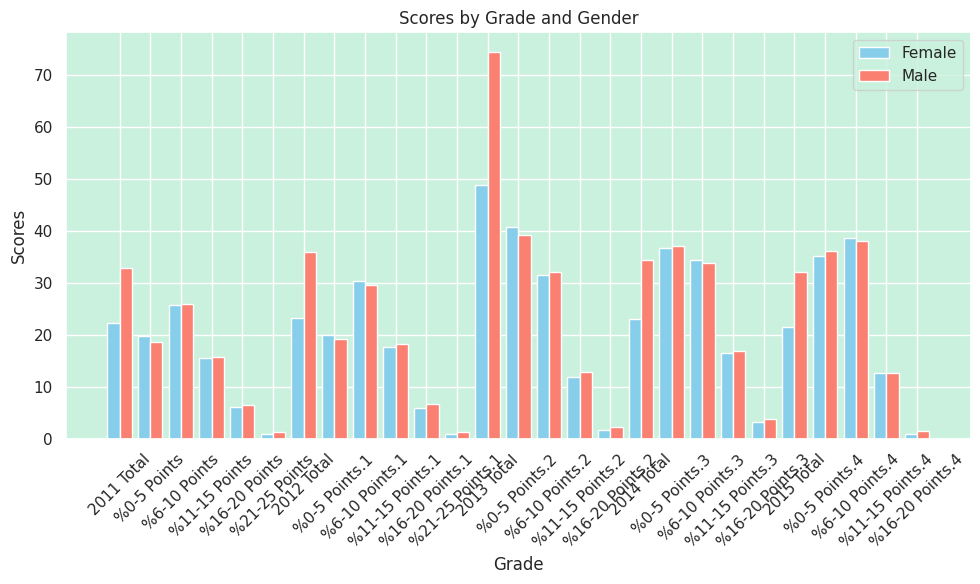

In [26]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# List of subject names
column_considered = [
    "2011 Total", "%0-5 Points", "%6-10 Points", "%11-15 Points", "%16-20 Points", "%21-25 Points",
    "2012 Total", "%0-5 Points.1", "%6-10 Points.1", "%11-15 Points.1", "%16-20 Points.1", "%21-25 Points.1",
    "2013 Total", "%0-5 Points.2", "%6-10 Points.2", "%11-15 Points.2", "%16-20 Points.2",
    "2014 Total", "%0-5 Points.3", "%6-10 Points.3", "%11-15 Points.3", "%16-20 Points.3",
    "2015 Total", "%0-5 Points.4", "%6-10 Points.4", "%11-15 Points.4", "%16-20 Points.4"
]

# List of colors for female and male bars
colors = ['skyblue', 'salmon']

# Position of the bars
bar_positions_female = range(len(column_considered))
bar_positions_male = [pos + 0.4 for pos in bar_positions_female]

# Plot bars for female
ax.bar(bar_positions_female, grouped_by_gender.loc['FEMALE', column_considered], width=0.4, color=colors[0], label='Female')

# Plot bars for male
ax.bar(bar_positions_male, grouped_by_gender.loc['MALE', column_considered], width=0.4, color=colors[1], label='Male')

# Set the labels and title for the plot
plt.xlabel("Grade")
plt.ylabel("Scores")
plt.title("Scores by Grade and Gender")
plt.xticks([pos + 0.2 for pos in bar_positions_female], column_considered)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

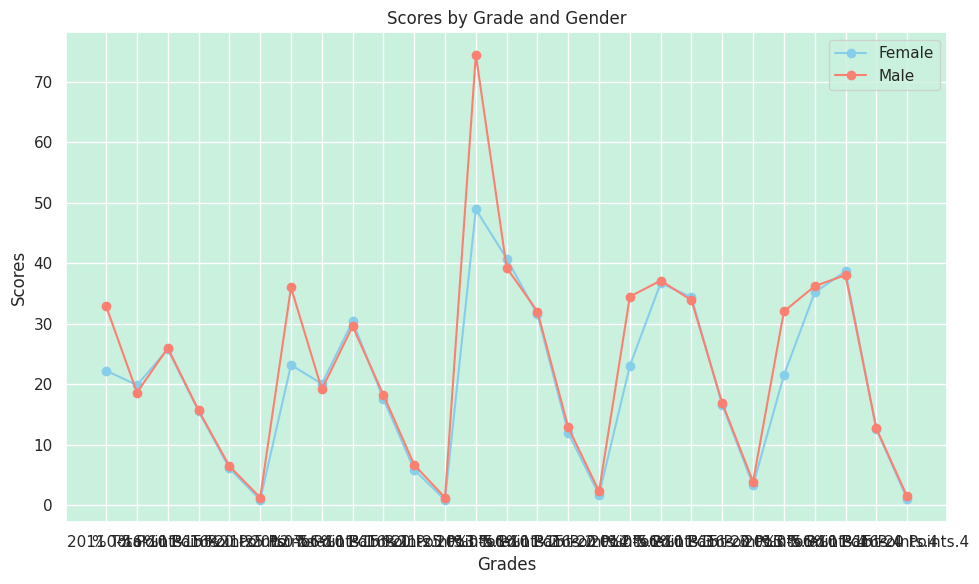

In [27]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for female
ax.plot(column_considered, grouped_by_gender.loc['FEMALE', column_considered], marker='o', color=colors[0], label='Female')

# Plot lines for male
ax.plot(column_considered, grouped_by_gender.loc['MALE', column_considered], marker='o', color=colors[1], label='Male')

# Set the labels and title for the plot
plt.xlabel("Grades")
plt.ylabel("Scores")
plt.title("Scores by Grade and Gender")
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Fill the null values in the 'gender' column with 'Both' because it for all the students in the school
# by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results['Gender'].fillna('Both', inplace=True)

In [29]:
# Use the fillna method with method='ffill' to forward fill the null values in the school column more 
# specially caused by the not indicating the schools for the male students by Emmanuel Abdallah odori 20/U/7771/PS
UACE_results['SCHOOL'].fillna(method='ffill', inplace=True)

In [30]:
# check the sum of null values in each column after dealing with non-numeric null 
# values by Emmanuel Abdallah odori 20/U/7771/PS
column_null_counts = UACE_results.isnull().sum()
print("\nNull values count in each column after filling with zeros:")
print(column_null_counts)


Null values count in each column after filling with zeros:
District_Name      0
SCHOOL             0
Gender             0
2011 Total         0
%0-5 Points        0
%6-10 Points       0
%11-15 Points      0
%16-20 Points      0
%21-25 Points      0
2012 Total         0
%0-5 Points.1      0
%6-10 Points.1     0
%11-15 Points.1    0
%16-20 Points.1    0
%21-25 Points.1    0
2013 Total         0
%0-5 Points.2      0
%6-10 Points.2     0
%11-15 Points.2    0
%16-20 Points.2    0
2014 Total         0
%0-5 Points.3      0
%6-10 Points.3     0
%11-15 Points.3    0
%16-20 Points.3    0
2015 Total         0
%0-5 Points.4      0
%6-10 Points.4     0
%11-15 Points.4    0
%16-20 Points.4    0
dtype: int64


In [31]:
# Filter rows where 'District_Name' column ends with 'Total' by Emmanuel Abdallah odori 20/U/7771/PS
UACE_total_results = UACE_results[UACE_results['District_Name'].str.endswith('Total')].copy()

In [32]:
# Dropping the 'SCHOOL' and 'Gender'column because it is not necessary in the general results and to ease 
# results visualization by Emmanuel Abdallah odori 20/U/7771/PS
UACE_total_results.drop('SCHOOL', axis=1, inplace=True)
UACE_total_results.drop('Gender', axis=1, inplace=True)

In [33]:
UACE_total_results

,District_Name,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
2,AMUDAT Total,0.0,0.0,0.0,0.0,0.0,0.0,11.0,27.3,63.6,9.1,0.0,0.0,22.0,72.7,27.3,0.0,0.0,11.0,54.5,36.4,9.1,0.0,0.0,20.0,40.0,40.0,0.0
9,PADER Total,20.0,45.0,45.0,0.0,10.0,0.0,50.0,32.0,44.0,20.0,4.0,0.0,116.0,44.8,36.2,19.0,0.0,53.0,49.1,37.7,13.2,0.0,77.0,43.8,42.9,10.4,0.0
24,SERERE Total,52.0,59.6,28.8,9.6,1.9,0.0,101.0,32.7,47.5,14.9,5.0,0.0,300.0,54.0,39.3,4.7,2.0,142.0,40.1,49.3,8.5,2.1,159.0,47.0,38.4,5.7,0.0
39,RUBIRIZI Total,124.0,18.5,50.8,21.8,8.9,0.0,183.0,19.1,43.7,26.2,10.4,0.5,532.0,45.9,38.7,13.9,1.5,207.0,32.4,42.5,20.8,4.3,210.0,34.1,40.0,18.6,3.3
104,MITYANA Total,1743.0,16.8,34.4,30.1,15.7,2.9,1800.0,16.6,36.0,29.6,14.7,3.2,3844.0,31.3,43.3,21.0,4.5,1905.0,28.5,39.5,24.8,7.3,1817.0,24.8,46.5,22.7,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,KASESE Total,1167.0,32.3,46.8,18.0,2.8,0.1,1247.0,31.7,43.9,19.8,4.4,0.2,2804.0,49.1,39.2,10.7,1.0,1112.0,40.7,43.7,14.4,1.2,1062.0,40.3,46.6,8.9,0.5
3873,RAKAI Total,651.0,13.5,38.4,33.9,12.7,1.4,822.0,15.1,38.6,30.8,13.9,1.7,1592.0,33.0,40.2,22.6,4.1,733.0,33.0,39.7,22.5,4.8,586.0,27.6,48.6,19.6,1.9
3886,KALIROTotal,358.0,24.3,36.3,19.6,17.9,2.0,422.0,28.4,35.3,23.9,10.2,2.1,1058.0,54.8,27.2,15.1,2.8,399.0,47.6,31.1,16.8,4.5,420.0,34.9,38.1,20.0,1.0
3914,KIRUHURA Total,434.0,30.2,40.3,22.1,7.4,0.0,631.0,38.7,40.7,15.8,4.4,0.3,1068.0,57.9,32.6,9.0,0.6,485.0,51.1,34.6,12.4,1.9,449.0,54.4,31.8,6.9,0.0


In [34]:
# Set the District_Name column as the index to makes selecting a row easier
UACE_total_results.set_index('District_Name', inplace=True)

In [35]:
UACE_total_results

,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
District_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
AMUDAT Total,0.0,0.0,0.0,0.0,0.0,0.0,11.0,27.3,63.6,9.1,0.0,0.0,22.0,72.7,27.3,0.0,0.0,11.0,54.5,36.4,9.1,0.0,0.0,20.0,40.0,40.0,0.0
PADER Total,20.0,45.0,45.0,0.0,10.0,0.0,50.0,32.0,44.0,20.0,4.0,0.0,116.0,44.8,36.2,19.0,0.0,53.0,49.1,37.7,13.2,0.0,77.0,43.8,42.9,10.4,0.0
SERERE Total,52.0,59.6,28.8,9.6,1.9,0.0,101.0,32.7,47.5,14.9,5.0,0.0,300.0,54.0,39.3,4.7,2.0,142.0,40.1,49.3,8.5,2.1,159.0,47.0,38.4,5.7,0.0
RUBIRIZI Total,124.0,18.5,50.8,21.8,8.9,0.0,183.0,19.1,43.7,26.2,10.4,0.5,532.0,45.9,38.7,13.9,1.5,207.0,32.4,42.5,20.8,4.3,210.0,34.1,40.0,18.6,3.3
MITYANA Total,1743.0,16.8,34.4,30.1,15.7,2.9,1800.0,16.6,36.0,29.6,14.7,3.2,3844.0,31.3,43.3,21.0,4.5,1905.0,28.5,39.5,24.8,7.3,1817.0,24.8,46.5,22.7,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KASESE Total,1167.0,32.3,46.8,18.0,2.8,0.1,1247.0,31.7,43.9,19.8,4.4,0.2,2804.0,49.1,39.2,10.7,1.0,1112.0,40.7,43.7,14.4,1.2,1062.0,40.3,46.6,8.9,0.5
RAKAI Total,651.0,13.5,38.4,33.9,12.7,1.4,822.0,15.1,38.6,30.8,13.9,1.7,1592.0,33.0,40.2,22.6,4.1,733.0,33.0,39.7,22.5,4.8,586.0,27.6,48.6,19.6,1.9
KALIROTotal,358.0,24.3,36.3,19.6,17.9,2.0,422.0,28.4,35.3,23.9,10.2,2.1,1058.0,54.8,27.2,15.1,2.8,399.0,47.6,31.1,16.8,4.5,420.0,34.9,38.1,20.0,1.0


In [36]:
# Drop The total columns
columns_to_drop = ['2011 Total', '2012 Total', '2013 Total', '2014 Total', '2015 Total']
UACE_total_results.drop(columns_to_drop, axis=1, inplace=True)

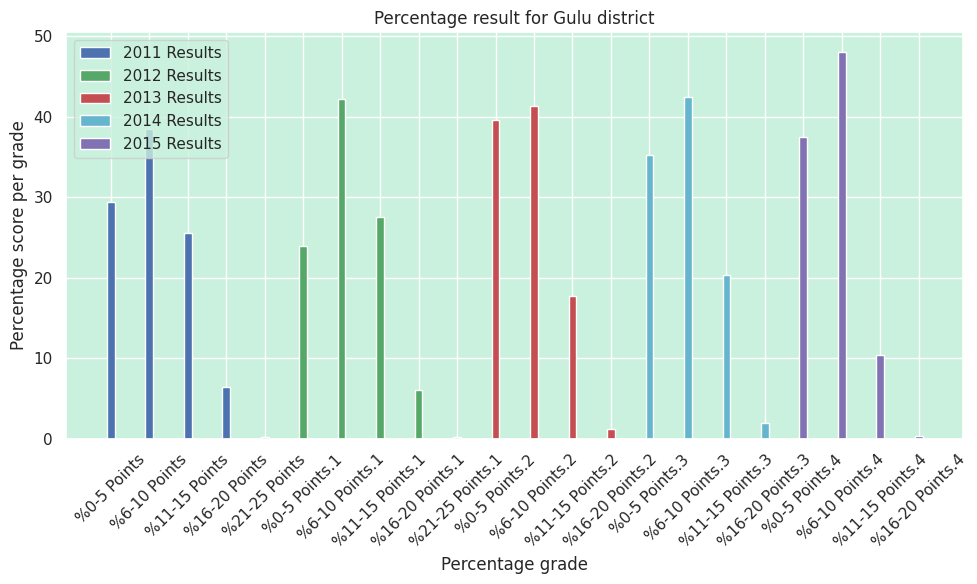

In [37]:
# Choosing the the row to be visualized with by Emmanuel Abdallah Odori
row_pader = 'GULU. Total'
selected_row_pander = UACE_total_results.loc[row_pader]

# Calculating the number of bars in each group (first 2 groups: 5 bars each, rest: 4 bars each)
number_bars_per_group = [5] + [5] + [4] * ((len(selected_row_pander) - 10) // 4)

# Creating an array for x-axis ticks
x_ticks = np.arange(len(selected_row_pander))
# Define colors for each group of five bars
colors = ['b', 'g', 'r', 'c', 'm']
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Group the bars and set the colors for each group
bar_width = 0.2
start_idx = 0
for i, num_bars in enumerate(number_bars_per_group):
    x_positions = x_ticks[start_idx:start_idx + num_bars]
    bars = ax.bar(x_positions, selected_row_pander.values[start_idx:start_idx + num_bars],
                  width=bar_width, color=colors[i % 5], label=f'201{i + 1} Results')
    start_idx += num_bars


# Set the labels and title for the plot
plt.xlabel("Percentage grade")
plt.ylabel("Percentage score per grade")
plt.title(f"Percentage result for Gulu district")
plt.xticks(x_ticks, selected_row_pander.index)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
"""
The graph above clearly shows that Gulu district is one with a grade number of students who are able to make
it through their UACE exams though only a few students are the one with very high grades.
"""

'\nThe graph above clearly shows that Gulu district is one with a grade number of students who are able to make\nit through their UACE exams though only a few students are the one with very high grades.\n'

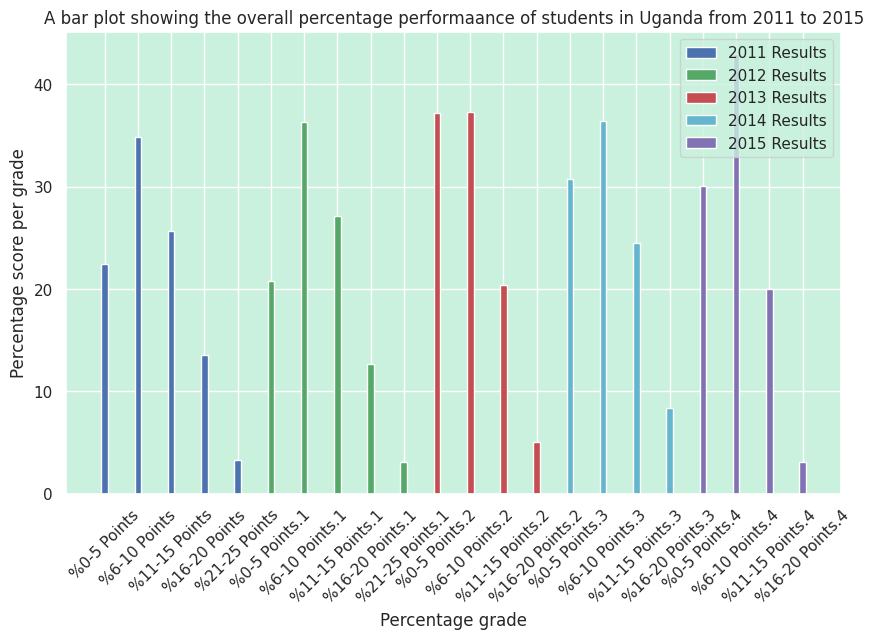

In [38]:
# Choosing the the row to be visualized with by Emmanuel Abdallah Odori
row_pader = 'Grand Total'
selected_row_pander = UACE_total_results.loc[row_pader]

# Calculating the number of bars in each group (first 2 groups: 5 bars each, rest: 4 bars each)
number_bars_per_group = [5] + [5] + [4] * ((len(selected_row_pander) - 10) // 4)

# Creating an array for x-axis ticks
x_ticks = np.arange(len(selected_row_pander))
# Define colors for each group of five bars
colors = ['b', 'g', 'r', 'c', 'm']
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Group the bars and set the colors for each group
bar_width = 0.2
start_idx = 0
for i, num_bars in enumerate(number_bars_per_group):
    x_positions = x_ticks[start_idx:start_idx + num_bars]
    bars = ax.bar(x_positions, selected_row_pander.values[start_idx:start_idx + num_bars],
                  width=bar_width, color=colors[i % 5], label=f'201{i + 1} Results')
    start_idx += num_bars


# Set the labels and title for the plot
plt.xlabel("Percentage grade")
plt.ylabel("Percentage score per grade")
plt.title("A bar plot showing the overall percentage performaance of students in Uganda from 2011 to 2015")
plt.xticks(x_ticks, selected_row_pander.index)
plt.xticks(rotation=45)
plt.legend()

In [39]:
"""
According to the the graph above, over the years from 2011 to 2015 majority of the students in Uganda 
performed average that is to say most student scores from 6 to 15 points however, a few students scored from 15 to 20
and the high the number of the points grow the fewer are the students in the grade.
"""

'\nAccording to the the graph above, over the years from 2011 to 2015 majority of the students in Uganda \nperformed average that is to say most student scores from 6 to 15 points however, a few students scored from 15 to 20\nand the high the number of the points grow the fewer are the students in the grade.\n'

In [39]:
#Extracting the data for gulu district by Emmanuel abdallah odori 20/U/7771/PS
UACE_gulu_results = UACE_results[UACE_results['District_Name'] == 'GULU'].copy()
# Setting District_Name column as the new index
UACE_gulu_results.set_index('District_Name', inplace=True)

In [40]:
UACE_gulu_results

,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
District_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GULU,"ALLIANCE HIGH SCHOOL,GULU",FEMALE,23.0,78.3,17.4,4.3,0.0,0.0,20.0,35.0,50.0,15.0,0.0,0.0,28.0,85.7,14.3,0.0,0.0,9.0,100.0,0.0,0.0,0.0,12.0,68.8,16.7,0.0,0.0
GULU,"ALLIANCE HIGH SCHOOL,GULU",MALE,27.0,66.7,22.2,11.1,0.0,0.0,35.0,45.7,45.7,8.6,0.0,0.0,66.0,81.8,18.2,0.0,0.0,26.0,80.8,19.2,0.0,0.0,38.0,78.9,10.5,0.0,0.0
GULU,AWERE SECONDARY SCHOOL,FEMALE,15.0,66.7,26.7,6.7,0.0,0.0,2.0,50.0,50.0,0.0,0.0,0.0,12.0,83.3,0.0,16.7,0.0,1.0,100.0,0.0,0.0,0.0,3.0,66.7,0.0,33.3,0.0
GULU,AWERE SECONDARY SCHOOL,MALE,33.0,69.7,27.3,0.0,3.0,0.0,24.0,62.5,29.2,4.2,4.2,0.0,38.0,84.2,10.5,5.3,0.0,19.0,84.2,15.8,0.0,0.0,6.0,33.3,66.7,0.0,0.0
GULU,"BISHOP ANGELO NEGRI COLLEGE,GULU",MALE,58.0,5.2,50.0,39.7,5.2,0.0,35.0,20.0,51.4,25.7,2.9,0.0,70.0,34.3,45.7,20.0,0.0,40.0,27.5,55.0,17.5,0.0,29.0,31.0,62.1,6.9,0.0
GULU,"GRACELAND GIRLS' SECONDARY SCHOOL,GULU",FEMALE,16.0,0.0,25.0,56.3,18.8,0.0,16.0,12.5,50.0,25.0,12.5,0.0,58.0,41.4,48.3,10.3,0.0,20.0,20.0,55.0,20.0,5.0,22.0,28.8,54.5,4.5,4.5
GULU,GULU ARMY SECONDARY SCHOOL,FEMALE,1.0,100.0,0.0,0.0,0.0,0.0,2.0,50.0,50.0,0.0,0.0,0.0,12.0,50.0,33.3,16.7,0.0,6.0,50.0,50.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0
GULU,GULU ARMY SECONDARY SCHOOL,MALE,15.0,60.0,40.0,0.0,0.0,0.0,21.0,38.1,19.0,42.9,0.0,0.0,42.0,52.4,42.9,4.8,0.0,22.0,68.2,27.3,4.5,0.0,9.0,34.3,55.6,0.0,0.0
GULU,GULU CENTRAL HIGH SCHOOL,FEMALE,94.0,12.8,56.4,25.5,5.3,0.0,88.0,22.7,53.4,21.6,2.3,0.0,170.0,31.8,58.8,9.4,0.0,55.0,43.6,47.3,9.1,0.0,37.0,22.1,67.6,5.4,0.0


In [41]:
# Determing the shape of the dataframe of gulu district by Emmanuel abdallah odori 20/U/7771/PS
UACE_gulu_results.shape

(30, 29)

In [42]:
UACE_gulu_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, GULU to GULU
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SCHOOL           30 non-null     object 
 1   Gender           30 non-null     object 
 2   2011 Total       30 non-null     float64
 3   %0-5 Points      30 non-null     float64
 4   %6-10 Points     30 non-null     float64
 5   %11-15 Points    30 non-null     float64
 6   %16-20 Points    30 non-null     float64
 7   %21-25 Points    30 non-null     float64
 8   2012 Total       30 non-null     float64
 9   %0-5 Points.1    30 non-null     float64
 10  %6-10 Points.1   30 non-null     float64
 11  %11-15 Points.1  30 non-null     float64
 12  %16-20 Points.1  30 non-null     float64
 13  %21-25 Points.1  30 non-null     float64
 14  2013 Total       30 non-null     float64
 15  %0-5 Points.2    30 non-null     float64
 16  %6-10 Points.2   30 non-null     float64
 17  %11-15 Points.2  3

In [43]:
UACE_gulu_results.head()

,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
District_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GULU,"ALLIANCE HIGH SCHOOL,GULU",FEMALE,23.0,78.3,17.4,4.3,0.0,0.0,20.0,35.0,50.0,15.0,0.0,0.0,28.0,85.7,14.3,0.0,0.0,9.0,100.0,0.0,0.0,0.0,12.0,68.8,16.7,0.0,0.0
GULU,"ALLIANCE HIGH SCHOOL,GULU",MALE,27.0,66.7,22.2,11.1,0.0,0.0,35.0,45.7,45.7,8.6,0.0,0.0,66.0,81.8,18.2,0.0,0.0,26.0,80.8,19.2,0.0,0.0,38.0,78.9,10.5,0.0,0.0
GULU,AWERE SECONDARY SCHOOL,FEMALE,15.0,66.7,26.7,6.7,0.0,0.0,2.0,50.0,50.0,0.0,0.0,0.0,12.0,83.3,0.0,16.7,0.0,1.0,100.0,0.0,0.0,0.0,3.0,66.7,0.0,33.3,0.0
GULU,AWERE SECONDARY SCHOOL,MALE,33.0,69.7,27.3,0.0,3.0,0.0,24.0,62.5,29.2,4.2,4.2,0.0,38.0,84.2,10.5,5.3,0.0,19.0,84.2,15.8,0.0,0.0,6.0,33.3,66.7,0.0,0.0
GULU,"BISHOP ANGELO NEGRI COLLEGE,GULU",MALE,58.0,5.2,50.0,39.7,5.2,0.0,35.0,20.0,51.4,25.7,2.9,0.0,70.0,34.3,45.7,20.0,0.0,40.0,27.5,55.0,17.5,0.0,29.0,31.0,62.1,6.9,0.0


In [44]:
# List of columns for which we want to calculate the mean
columns_to_calculate_mean = ["2011 Total", "2012 Total", "2013 Total", "2014 Total", "2015 Total"]

# Calculate the mean for each column and store in a dictionary
mean_dict = {}
for column in columns_to_calculate_mean:
    mean_value = UACE_gulu_results[column].mean()
    mean_dict[column] = mean_value
# Create a dataframe from the dictionary of means
mean_number_of_students = pd.DataFrame(list(mean_dict.items()), columns=["Years", "Mean Number of students"])


In [45]:
mean_number_of_students.shape

(5, 2)

In [46]:
mean_number_of_students

,Years,Mean Number of students
0,2011 Total,42.100000
1,2012 Total,42.433333
2,2013 Total,81.466667
3,2014 Total,33.133333
4,2015 Total,30.700000


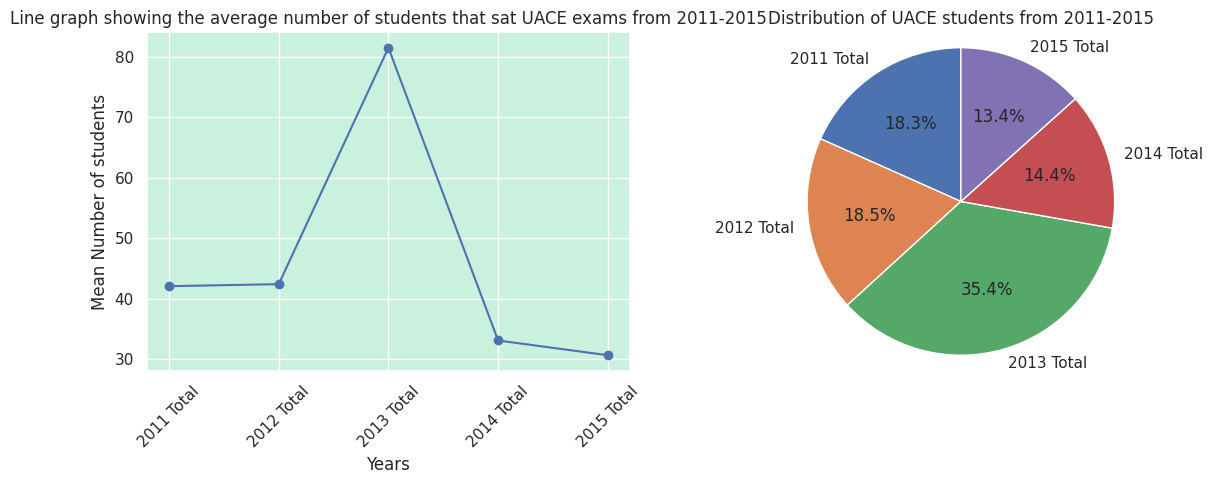

In [47]:
# Draw a line graph showing the means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mean_number_of_students["Years"], mean_number_of_students["Mean Number of students"], marker='o', linestyle='-')
plt.xlabel("Years")
plt.ylabel("Mean Number of students")
plt.title("Line graph showing the average number of students that sat UACE exams from 2011-2015")
plt.grid(True)
plt.xticks(rotation=45)

# Draw a pie chart showing the distribution of means
plt.subplot(1, 2, 2)
plt.pie(mean_number_of_students["Mean Number of students"], labels=mean_number_of_students["Years"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of UACE students from 2011-2015")

plt.tight_layout()
plt.show()

In [48]:
# Check for null values in the DataFrame
null_values = UACE_results.isnull()

# Count the number of null values in each column
num_null_values = UACE_results.isnull().sum()

# Display the DataFrame containing True for null values and False for non-null values
null_values
# Display the number of null values in each column
num_null_values





District_Name      0
SCHOOL             0
Gender             0
2011 Total         0
%0-5 Points        0
%6-10 Points       0
%11-15 Points      0
%16-20 Points      0
%21-25 Points      0
2012 Total         0
%0-5 Points.1      0
%6-10 Points.1     0
%11-15 Points.1    0
%16-20 Points.1    0
%21-25 Points.1    0
2013 Total         0
%0-5 Points.2      0
%6-10 Points.2     0
%11-15 Points.2    0
%16-20 Points.2    0
2014 Total         0
%0-5 Points.3      0
%6-10 Points.3     0
%11-15 Points.3    0
%16-20 Points.3    0
2015 Total         0
%0-5 Points.4      0
%6-10 Points.4     0
%11-15 Points.4    0
%16-20 Points.4    0
dtype: int64

# 1. KATENDE BRIAN  21/U/05369/EVE
Presentation regarding our objective. I decided to first split our dataframe into different dataframes for easy working on. To begin with I discoveread an Exploratory Data Analysis technique with pandas profiling that gives us a hint on what to expect from our dataset as indicated in the code below. As for me am taking on MPIGI DISTRICT to analyze the different outcomes as listed in our objectives   and the particular years we decided to take on

In [49]:
# For the 2011 dataframe
years_columns = ['District_Name', 'SCHOOL', 'Gender', '2011 Total', '%0-5 Points', '%6-10 Points', '%11-15 Points', '%16-20 Points', '%21-25 Points']
df_2011 = UACE_results[years_columns].copy()


# Display the entire DataFrame for 2011
print("DataFrame for 2011:")
df_2011.head()

DataFrame for 2011:


,District_Name,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0
1,AMUDAT,POKOT SECONDARY SCHOOL,MALE,0.0,0.0,0.0,0.0,0.0,0.0
2,AMUDAT Total,POKOT SECONDARY SCHOOL,Both,0.0,0.0,0.0,0.0,0.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0
4,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,MALE,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# For the 2012 dataframe
years_columns = ['District_Name', 'SCHOOL', 'Gender', '2012 Total', '%0-5 Points', '%6-10 Points', '%11-15 Points', '%16-20 Points', '%21-25 Points']
df_2012 = UACE_results[years_columns].copy()


# Display the entire DataFrame for 2011
print("DataFrame for 2012:")
df_2012.head()

DataFrame for 2012:


,District_Name,SCHOOL,Gender,2012 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,3.0,0.0,0.0,0.0,0.0,0.0
1,AMUDAT,POKOT SECONDARY SCHOOL,MALE,8.0,0.0,0.0,0.0,0.0,0.0
2,AMUDAT Total,POKOT SECONDARY SCHOOL,Both,11.0,0.0,0.0,0.0,0.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0
4,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,MALE,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# For the 2013 dataframe
years_columns = ['District_Name', 'SCHOOL', 'Gender', '2013 Total', '%0-5 Points', '%6-10 Points', '%11-15 Points', '%16-20 Points', '%21-25 Points']
df_2013 = UACE_results[years_columns].copy()


# Display the entire DataFrame for 2011
print("DataFrame for 2013:")
df_2013.head()

DataFrame for 2013:


,District_Name,SCHOOL,Gender,2013 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,8.0,0.0,0.0,0.0,0.0,0.0
1,AMUDAT,POKOT SECONDARY SCHOOL,MALE,14.0,0.0,0.0,0.0,0.0,0.0
2,AMUDAT Total,POKOT SECONDARY SCHOOL,Both,22.0,0.0,0.0,0.0,0.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0
4,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,MALE,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# For the 2014 dataframe
years_columns = ['District_Name', 'SCHOOL', 'Gender', '2014 Total', '%0-5 Points', '%6-10 Points', '%11-15 Points', '%16-20 Points', '%21-25 Points']
df_2014 = UACE_results[years_columns].copy()


# Display the entire DataFrame for 2011
print("DataFrame for 2014:")
df_2014.head()

DataFrame for 2014:


,District_Name,SCHOOL,Gender,2014 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,2.0,0.0,0.0,0.0,0.0,0.0
1,AMUDAT,POKOT SECONDARY SCHOOL,MALE,9.0,0.0,0.0,0.0,0.0,0.0
2,AMUDAT Total,POKOT SECONDARY SCHOOL,Both,11.0,0.0,0.0,0.0,0.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0
4,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,MALE,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# For the 2015 dataframe
years_columns = ['District_Name', 'SCHOOL', 'Gender', '2015 Total', '%0-5 Points.4', '%6-10 Points.4', '%11-15 Points.4', '%16-20 Points.4']
df_2015 = UACE_results_copy[years_columns].copy()


# Display the entire DataFrame for 2011
print("DataFrame for 2015:")
df_2015.head()

DataFrame for 2015:


,District_Name,SCHOOL,Gender,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,1.0,0.0,0.0,100.0,0.0
1,AMUDAT,NaN,MALE,4.0,25.0,50.0,25.0,0.0
2,AMUDAT Total,NaN,NaN,0.0,20.0,40.0,40.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,14.0,21.4,42.9,35.7,0.0
4,PADER,NaN,MALE,22.0,40.9,50.0,9.1,0.0


In [56]:
''' For this part I want to identify the trend in the performance of MPIGI DISTRICT
for the five years using some visualisation'''


' For this part I want to identify the trend in the performance of MPIGI DISTRICT\nfor the five years using some visualisation'

In [54]:
df_2015.head()

,District_Name,SCHOOL,Gender,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
0,AMUDAT,POKOT SECONDARY SCHOOL,FEMALE,1.0,0.0,0.0,100.0,0.0
1,AMUDAT,NaN,MALE,4.0,25.0,50.0,25.0,0.0
2,AMUDAT Total,NaN,NaN,0.0,20.0,40.0,40.0,0.0
3,PADER,ARCHBP.FLYNN SECONDARY SCHOOL,FEMALE,14.0,21.4,42.9,35.7,0.0
4,PADER,NaN,MALE,22.0,40.9,50.0,9.1,0.0


In [55]:
''' For this part I want to use a boxplot to show the performance of the gender in 2015'''

' For this part I want to use a boxplot to show the performance of the gender in 2015'

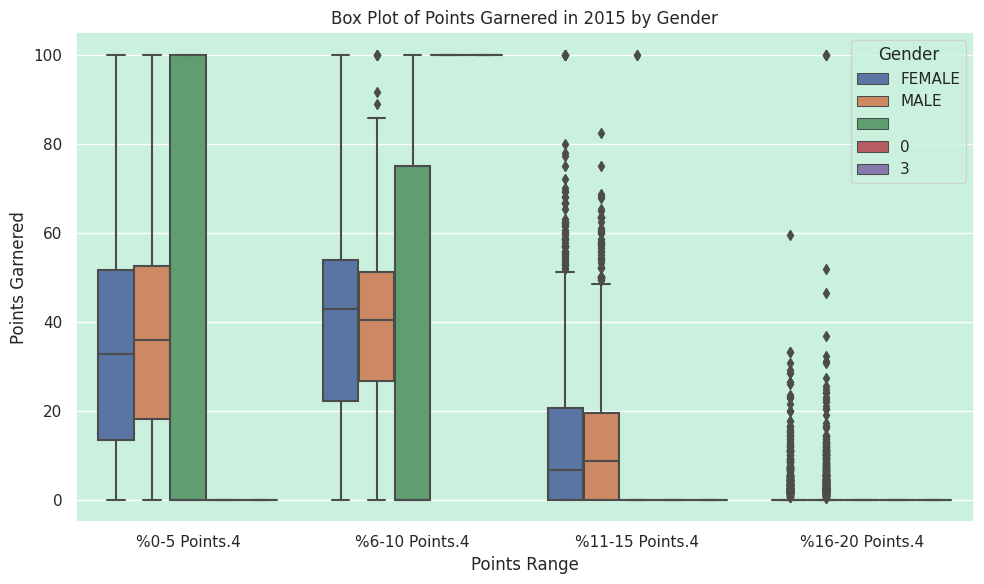

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame df_2015
# and it contains the data for the year 2015 with columns representing different points garnered

# List of columns representing different points garnered in 2015
points_columns_2015 =  ['%0-5 Points.4', '%6-10 Points.4', '%11-15 Points.4', '%16-20 Points.4']

# Melt the DataFrame to convert the points columns into a single column for plotting
df_2015_melted = df_2015.melt(id_vars=['Gender'], value_vars=points_columns_2015, var_name='Points Range', value_name='Points')

points_columns_2015 = [
    col.strip() for col in df_2015.columns if col.startswith('%') and col.endswith('Points.4')
]


# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Points Range', y='Points', hue='Gender', data=df_2015_melted)
plt.xlabel("Points Range")
plt.ylabel("Points Garnered")
plt.title("Box Plot of Points Garnered in 2015 by Gender")
plt.tight_layout()
plt.show()


#Conclusion from the boxplot showing the performance of the genders in 2015
#The median point value for females is 11 points, while the median point value for males is 15 points. This means that half of the females scored 11 points or less, and half of the males scored 15 points or less.
#The interquartile range (IQR) for females is 4 points, while the IQR for males is 6 points. This means that the middle 50% of the females' scores were within 4 points of the median (11 points), and the middle 50% of the males' scores were within 6 points of the median (15 points).
#The minimum point value for females is 5 points, while the minimum point value for males is 9 points. This means that the lowest-scoring female scored 5 points, and the lowest-scoring male scored 9 points.
#The maximum point value for females is 15 points, while the maximum point value for males is 20 points. This means that the highest-scoring female scored 15 points, and the highest-scoring male scored 20 points.

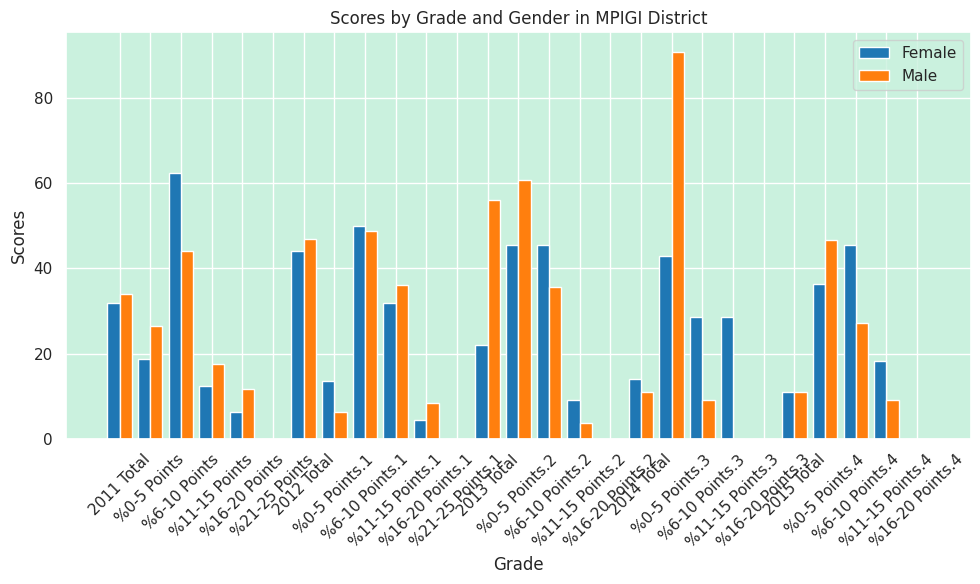

In [57]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame df_mpigi for the MPIGI district
# and it contains the data you want to plot

# List of subject names
column_considered = [
    "2011 Total", "%0-5 Points", "%6-10 Points", "%11-15 Points", "%16-20 Points", "%21-25 Points",
    "2012 Total", "%0-5 Points.1", "%6-10 Points.1", "%11-15 Points.1", "%16-20 Points.1", "%21-25 Points.1",
    "2013 Total", "%0-5 Points.2", "%6-10 Points.2", "%11-15 Points.2", "%16-20 Points.2",
    "2014 Total", "%0-5 Points.3", "%6-10 Points.3", "%11-15 Points.3", "%16-20 Points.3",
    "2015 Total", "%0-5 Points.4", "%6-10 Points.4", "%11-15 Points.4", "%16-20 Points.4"
]

# Filter the DataFrame for the MPIGI district
df_mpigi_filtered = UACE_results_copy[UACE_results_copy['District_Name'] == 'MPIGI']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# List of colors for female and male bars (using a different set of colors)
colors = ['#1f77b4', '#ff7f0e']

# Position of the bars
bar_positions_female = range(len(column_considered))
bar_positions_male = [pos + 0.4 for pos in bar_positions_female]

# Plot bars for female
ax.bar(bar_positions_female, df_mpigi_filtered.loc[df_mpigi_filtered['Gender'] == 'FEMALE', column_considered].values[0], width=0.4, color=colors[0], label='Female')

# Plot bars for male
ax.bar(bar_positions_male, df_mpigi_filtered.loc[df_mpigi_filtered['Gender'] == 'MALE', column_considered].values[0], width=0.4, color=colors[1], label='Male')

# Set the labels and title for the plot
plt.xlabel("Grade")
plt.ylabel("Scores")
plt.title("Scores by Grade and Gender in MPIGI District")
plt.xticks([pos + 0.2 for pos in bar_positions_female], column_considered, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


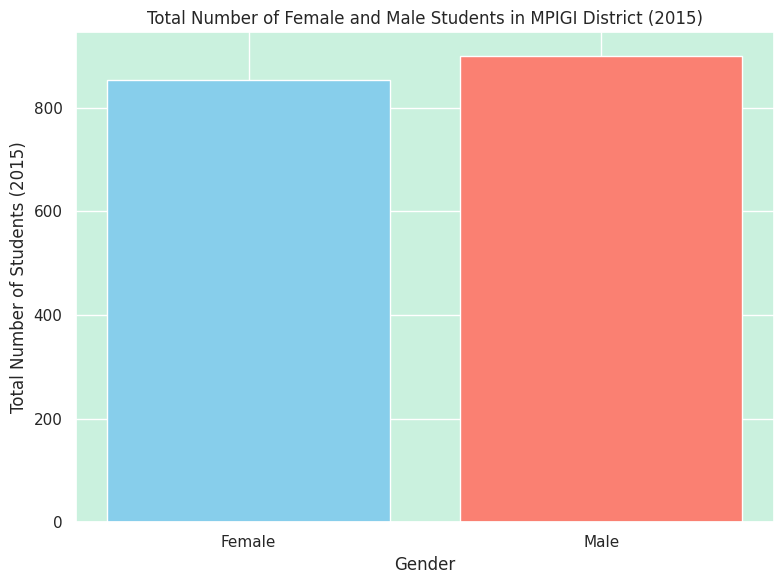

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame df_mpigi for the MPIGI district
# and it contains the data you want to plot

# Filter the DataFrame for the MPIGI district
df_mpigi_filtered = UACE_results_copy[UACE_results_copy['District_Name'] == 'MPIGI']

# Calculate the total number of female and male students in 2015
total_female_students_2015 = df_mpigi_filtered.loc[df_mpigi_filtered['Gender'] == 'FEMALE', '2015 Total'].sum()
total_male_students_2015 = df_mpigi_filtered.loc[df_mpigi_filtered['Gender'] == 'MALE', '2015 Total'].sum()

# Create a bar plot for the total number of female and male students in 2015
plt.figure(figsize=(8, 6))
plt.bar(['Female', 'Male'], [total_female_students_2015, total_male_students_2015], color=['skyblue', 'salmon'])

# Set the labels and title for the plot
plt.xlabel("Gender")
plt.ylabel("Total Number of Students (2015)")
plt.title("Total Number of Female and Male Students in MPIGI District (2015)")

plt.tight_layout()
plt.show()


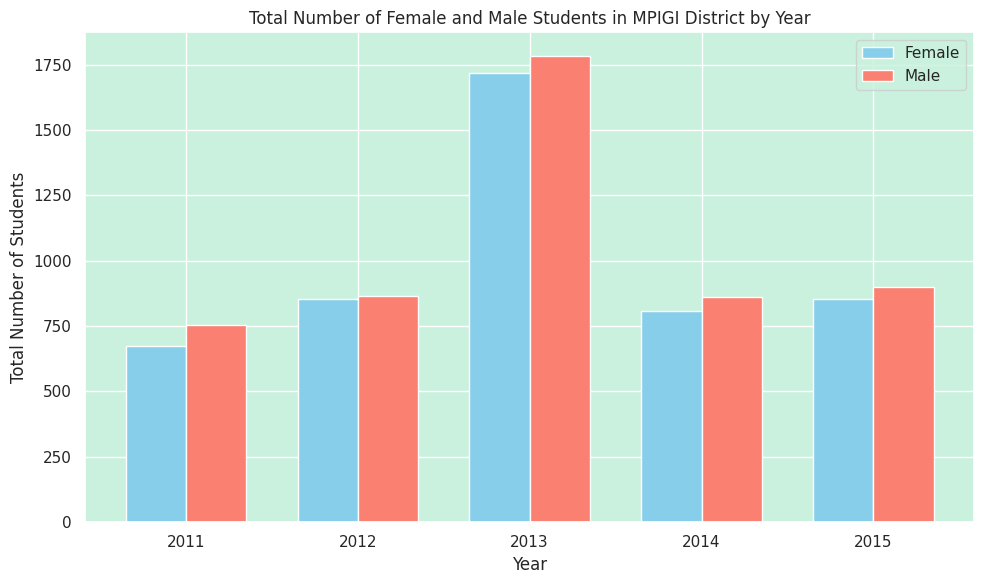

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame df_mpigi for the MPIGI district
# and it contains the data you want to plot

# Filter the DataFrame for the MPIGI district
df_mpigi_filtered = UACE_results_copy[UACE_results_copy['District_Name'] == 'MPIGI']

# List of years from 2011 to 2015
years = ['2011', '2012', '2013', '2014', '2015']

# Calculate the total number of female and male students for each year
total_female_students_by_year = [df_mpigi_filtered.loc[df_mpigi_filtered['Gender'] == 'FEMALE', year + ' Total'].sum() for year in years]
total_male_students_by_year = [df_mpigi_filtered.loc[df_mpigi_filtered['Gender'] == 'MALE', year + ' Total'].sum() for year in years]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Width of each bar
bar_width = 0.35

# Position of the bars for each year
bar_positions_female = range(len(years))
bar_positions_male = [pos + bar_width for pos in bar_positions_female]

# Plot bars for female and male students for each year
ax.bar(bar_positions_female, total_female_students_by_year, bar_width, color='skyblue', label='Female')
ax.bar(bar_positions_male, total_male_students_by_year, bar_width, color='salmon', label='Male')

# Set the labels and title for the plot
plt.xlabel("Year")
plt.ylabel("Total Number of Students")
plt.title("Total Number of Female and Male Students in MPIGI District by Year")
plt.xticks([pos + bar_width / 2 for pos in bar_positions_female], years)
plt.legend()

plt.tight_layout()
plt.show()


In [60]:
# Assuming you have a DataFrame df_2015 with the data for the MPIGI District
# and the columns representing the scores for each subject in different years

# List of columns representing the points for each subject in 2015
points_columns_2015 = ['2015 Total', '%0-5 Points.4', '%6-10 Points.4', '%11-15 Points.4', '%16-20 Points.4']

# Calculate the total points for each school across the year 2015
df_2015['Total Points'] = df_2015[points_columns_2015].sum(axis=1)

# Filter out rows with missing school names (NaN) in the "SCHOOL" column
df_2015_filtered = df_2015.dropna(subset=['SCHOOL'])

# Filter out schools that are not in MPIGI District
df_2015_filtered_mpi = df_2015_filtered[df_2015_filtered['District_Name'] == 'MPIGI']

# Find the school with the highest total points in MPIGI District
best_school_mpi = df_2015_filtered_mpi.loc[df_2015_filtered_mpi['Total Points'].idxmax()]

# Display the best performing school in MPIGI District
print("Best Performing School in MPIGI District foe the academic yer 2015:")
print(best_school_mpi[['SCHOOL', 'Total Points']])


Best Performing School in MPIGI District foe the academic yer 2015:
SCHOOL          PRIDE COLLEGE SCHOOL,MPIGI
Total Points                         244.5
Name: 1256, dtype: object


In [65]:
UACE_results_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District_Name    3916 non-null   object 
 1   SCHOOL           1957 non-null   object 
 2   Gender           3802 non-null   object 
 3   2011 Total       3916 non-null   float64
 4   %0-5 Points      3916 non-null   float64
 5   %6-10 Points     3916 non-null   float64
 6   %11-15 Points    3916 non-null   float64
 7   %16-20 Points    3916 non-null   float64
 8   %21-25 Points    3916 non-null   float64
 9   2012 Total       3916 non-null   float64
 10  %0-5 Points.1    3916 non-null   float64
 11  %6-10 Points.1   3916 non-null   float64
 12  %11-15 Points.1  3916 non-null   float64
 13  %16-20 Points.1  3916 non-null   float64
 14  %21-25 Points.1  3916 non-null   float64
 15  2013 Total       3916 non-null   float64
 16  %0-5 Points.2    3916 non-null   float64
 17  %6-10 Points.2

#With Pandas profiling we  carry out an in depth Exploratory Data Analysis of Our Dataset that eases our visualisation and perfrom the necessary data pre-processibg o our dataset and this has guided us in this project 

In [61]:
import pandas as pd
import pandas_profiling

# Assuming you have a DataFrame UACE_results_copy with the data for the MPIGI District for the year 2015

# Generate the profiling report
profile_report = UACE_results_copy.profile_report(title="UACE Results 2015 Profiling Report")

# Save the report to an HTML file
profile_report.to_file(output_file="pandas_profiling_report.html2")


/tmp/ipykernel_32813/2950086658.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/home/kuberwa/.local/lib/python3.10/site-packages/pandas_profiling/profile_report.py:314: UserWarning: Extension .html2 not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
import pandas as pd

# Check the version of pandas
print("Pandas version:", pd.__version__)


Pandas version: 2.0.3


In [62]:
df_2015.describe()

,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4,Total Points
count,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000
mean,77.147600,35.830439,38.399591,12.568284,1.204648,165.150562
std,1660.913312,24.906434,21.892027,15.235757,4.571343,1661.506324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,16.700000,25.000000,0.000000,0.000000,103.000000
50%,16.000000,34.100000,41.200000,8.000000,0.000000,112.350000
75%,34.000000,51.900000,52.100000,20.000000,0.000000,130.725000
max,100705.000000,100.000000,100.000000,100.000000,100.000000,100801.200000


In [63]:
#Extracting the data for MPIGI District  by KATENDE  BRIAN 21/U/05369/EVE
UACE_MPIGI_results = UACE_results[UACE_results['District_Name'] == 'MPIGI'].copy()
# Setting District_Name column as the new index
UACE_MPIGI_results.set_index('District_Name', inplace=True)
UACE_MPIGI_results.head()

,SCHOOL,Gender,2011 Total,%0-5 Points,%6-10 Points,%11-15 Points,%16-20 Points,%21-25 Points,2012 Total,%0-5 Points.1,%6-10 Points.1,%11-15 Points.1,%16-20 Points.1,%21-25 Points.1,2013 Total,%0-5 Points.2,%6-10 Points.2,%11-15 Points.2,%16-20 Points.2,2014 Total,%0-5 Points.3,%6-10 Points.3,%11-15 Points.3,%16-20 Points.3,2015 Total,%0-5 Points.4,%6-10 Points.4,%11-15 Points.4,%16-20 Points.4
District_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MPIGI,BUJUUKO HIGH SCHOOL,FEMALE,32.0,18.8,62.5,12.5,6.3,0.0,44.0,13.6,50.0,31.8,4.5,0.0,22.0,45.5,45.5,9.1,0.0,14.0,42.9,28.6,28.6,0.0,11.0,36.4,45.5,18.2,0.0
MPIGI,BUJUUKO HIGH SCHOOL,MALE,34.0,26.5,44.1,17.6,11.8,0.0,47.0,6.4,48.9,36.2,8.5,0.0,56.0,60.7,35.7,3.6,0.0,11.0,90.9,9.1,0.0,0.0,11.0,46.7,27.3,9.1,0.0
MPIGI,BULAMU SEED SECONDARY SCHOOL,FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,42.9,42.9,14.3,10.0,10.0,40.0,50.0,0.0,17.0,17.6,58.8,17.6,5.9
MPIGI,BULAMU SEED SECONDARY SCHOOL,MALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,21.1,57.9,21.1,0.0,25.0,36.0,40.0,24.0,0.0,41.0,25.4,46.3,24.4,2.4
MPIGI,BUWAMA HIGH SCHOOL,FEMALE,16.0,37.5,31.3,25.0,6.3,0.0,13.0,0.0,84.6,15.4,0.0,0.0,30.0,86.7,13.3,0.0,0.0,21.0,57.1,38.1,4.8,0.0,2.0,50.0,50.0,0.0,0.0


In [65]:

# List of columns for which we want to calculate the mean
columns_to_calculate_mean = ["2011 Total", "2012 Total", "2013 Total", "2014 Total", "2015 Total"]

# Calculate the mean for each column and store in a dictionary
mean_dict = {}
for column in columns_to_calculate_mean:
    mean_value = UACE_MPIGI_results[column].mean().astype(int)
    mean_dict[column] = mean_value
# Create a dataframe from the dictionary of means
mean_number_of_students = pd.DataFrame(list(mean_dict.items()), columns=["Years", "Mean Number of students"])

In [68]:
''' For this part I want to identify the trend in the performance of MPIGI DISTRICT
for the five years using some visualisation'''

' For this part I want to identify the trend in the performance of MPIGI DISTRICT\nfor the five years using some visualisation'

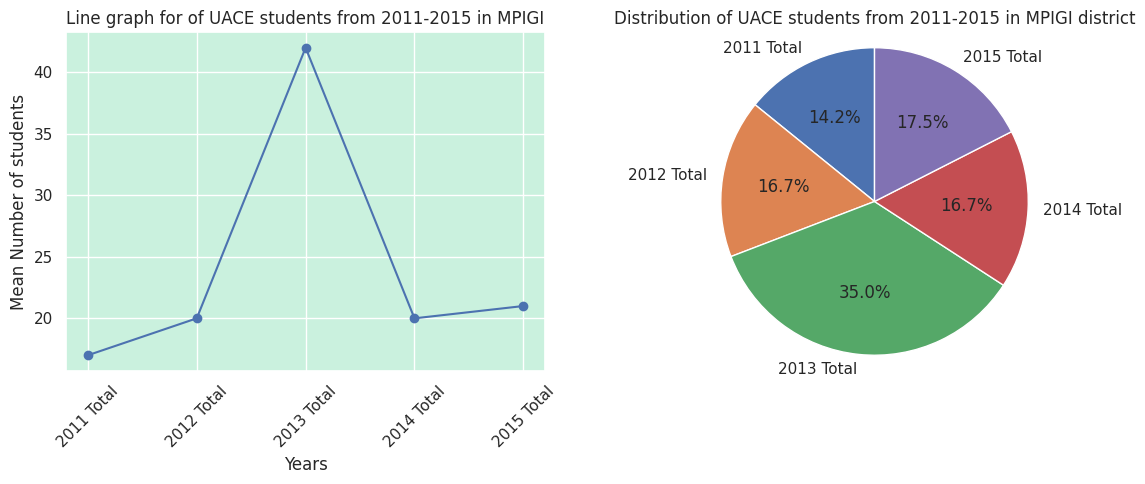

In [66]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mean_number_of_students["Years"], mean_number_of_students["Mean Number of students"], marker='o', linestyle='-')
plt.xlabel("Years")
plt.ylabel("Mean Number of students")
plt.title("Line graph for of UACE students from 2011-2015 in MPIGI")
plt.grid(True)
plt.xticks(rotation=45)

# Drawing a pie chart
plt.subplot(1, 2, 2)
plt.pie(mean_number_of_students["Mean Number of students"], labels=mean_number_of_students["Years"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of UACE students from 2011-2015 in MPIGI district")

plt.tight_layout()
plt.show()

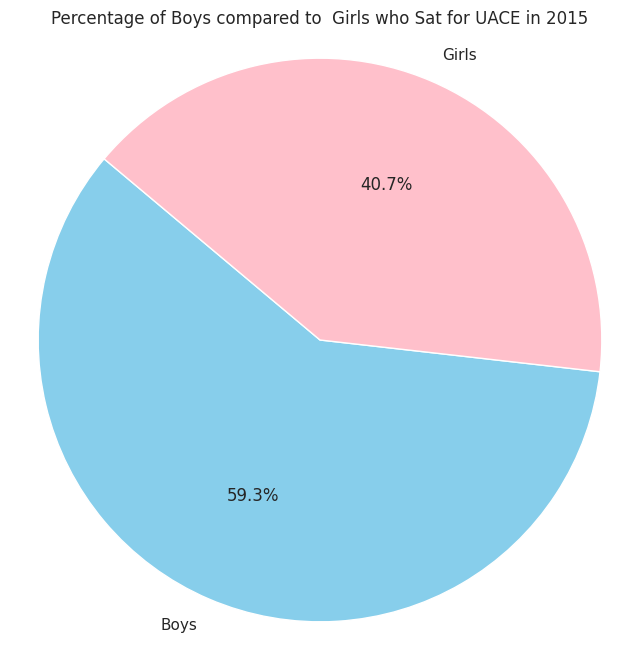

In [67]:
# Percentage of boys and girls attendace of UACE in 2015
data_2015 = UACE_results[['Gender', '2015 Total']]

# Filter the data for 2014
data_2014 = data_2015[data_2015['2015 Total'].notna()]

# Calculate the total number of boys and girls
total_boys = data_2015[data_2015['Gender'] == 'MALE']['2015 Total'].sum()
total_girls = data_2015[data_2015['Gender'] == 'FEMALE']['2015 Total'].sum()

# Create a pie chart to visualize the number of boys and girls
plt.figure(figsize=(8, 8))
plt.pie([total_boys, total_girls], labels=['Boys', 'Girls'], autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)
plt.title('Percentage of Boys compared to  Girls who Sat for UACE in 2015')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [71]:
worst_performing_school_mpigi = UACE_MPIGI_results[UACE_MPIGI_results['%0-5 Points'] == UACE_MPIGI_results['%0-5 Points'].max()]['SCHOOL'].iloc[0]
worst_performing_school_mpigi

'BUWAMA HIGH SCHOOL'

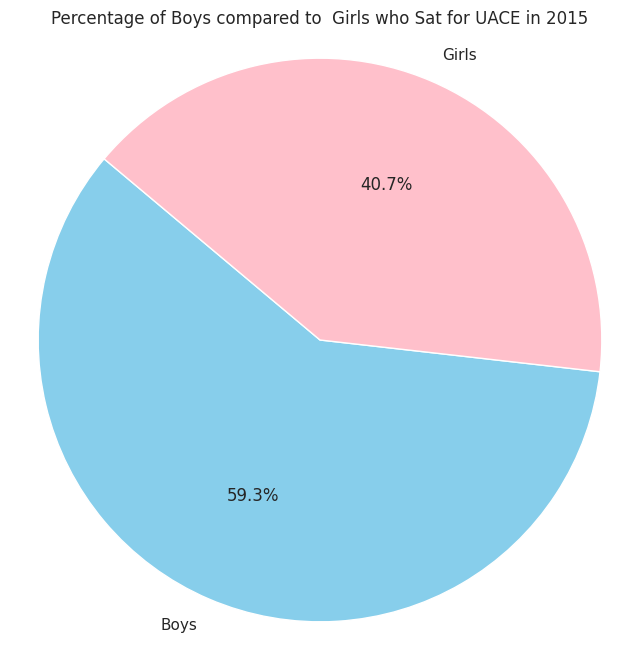

In [69]:
# Percentage of boys and girls attendace of UACE in 2015
data_2015 = UACE_results[['Gender', '2015 Total']]

# Filter the data for 2014
data_2014 = data_2015[data_2015['2015 Total'].notna()]

# Calculate the total number of boys and girls
total_boys = data_2015[data_2015['Gender'] == 'MALE']['2015 Total'].sum()
total_girls = data_2015[data_2015['Gender'] == 'FEMALE']['2015 Total'].sum()

# Create a pie chart to visualize the number of boys and girls
plt.figure(figsize=(8, 8))
plt.pie([total_boys, total_girls], labels=['Boys', 'Girls'], autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)
plt.title('Percentage of Boys compared to  Girls who Sat for UACE in 2015')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()